In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import sys

sys.path.append(os.path.abspath("../../"))
from dataset import DS_NAMES
from dataset import DS_DIMENSIONS
from utilities.figure_tools import get_latest_results_directory, make_fig_directory, load_results

In [5]:
run_id, run_path = get_latest_results_directory("../../results/vary-dim/")
fig_output_path = make_fig_directory(run_id)
found_ds, results = load_results(run_path)
print("Generating figures for run-{:03d}".format(run_id))
print("Datasets included:")
for ds in found_ds:
    print("\t", ds)

Generating figures for run-009
Datasets included:
	 annthyroid
	 cardio
	 http
	 mulcross
	 musk
	 pendigits
	 satimage
	 shuttle
	 thyroid
	 wbc


In [7]:
cmap = plt.get_cmap("Set1")
colors = cmap.colors

In [8]:
def render_plot(xfeature, yfeature, xlabel, ylabel, title, save_name):
    plt.figure()

    for i in range(len(found_ds)):
        ds = found_ds[i]
        plt.plot(results[ds][xfeature], results[ds][yfeature], label=ds, lw=2.0)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc="best")
    plt.xlim([2, 40])
    plt.savefig(fig_output_path + save_name)

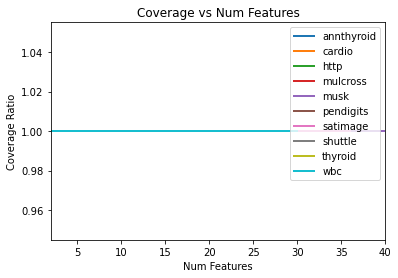

In [9]:
# Coverage vs Number of Features
render_plot("n_features", "coverage_ratio", "Num Features", "Coverage Ratio", "Coverage vs Num Features", "/coverage_nfeatures.png")

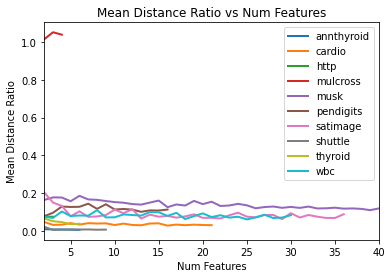

In [10]:
for ds in found_ds:
    results[ds]["mdr"] = results[ds].mean_distance / np.sqrt(results[ds].n_features)

# Distance vs Number of Features
render_plot("n_features", "mdr", "Num Features", "Mean Distance Ratio", "Mean Distance Ratio vs Num Features", "/distance_ratio_nfeatures.png")

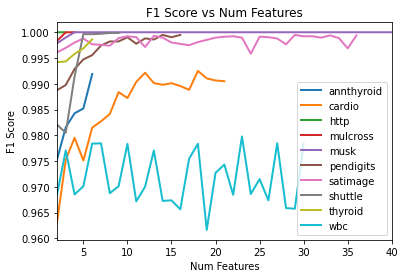

In [11]:
# F1 Score vs Num Features
render_plot("n_features", "f1", "Num Features", "F1 Score", "F1 Score vs Num Features", "/f1_nfeatures.png")

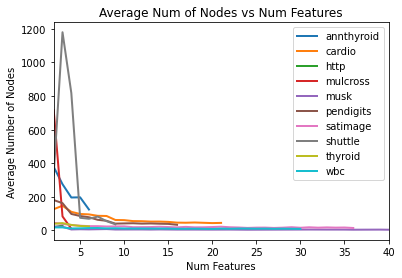

In [12]:
# Number of Nodes vs Number of Features
render_plot("n_features", "avg_nnodes", "Num Features", "Average Number of Nodes", "Average Num of Nodes vs Num Features", "/nnodes_nfeatures.png")

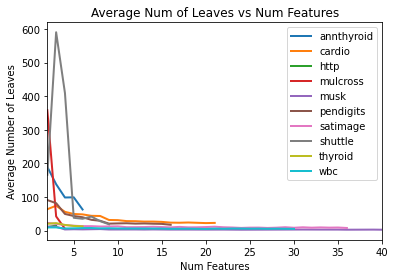

In [13]:
# Number of Leaves vs Number of Features
render_plot("n_features", "avg_nleaves", "Num Features", "Average Number of Leaves", "Average Num of Leaves vs Num Features", "/nleaves_nfeatures.png")

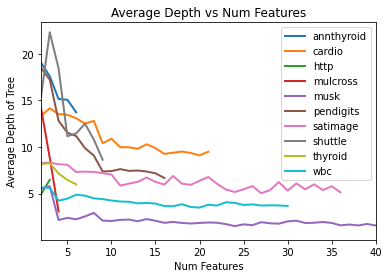

In [14]:
# Depth vs Number of Features
render_plot("n_features", "avg_depth", "Num Features", "Average Depth of Tree", "Average Depth vs Num Features", "/depth_nfeatures.png")

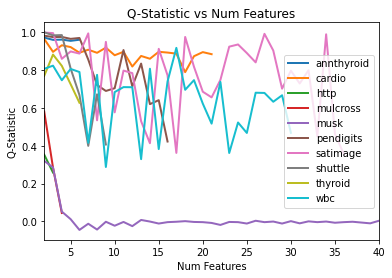

In [15]:
# Q-Statistic vs Number of Features
render_plot("n_features", "q", "Num Features", "Q-Statistic", "Q-Statistic vs Num Features", "/qstatistic_nfeatures.png")

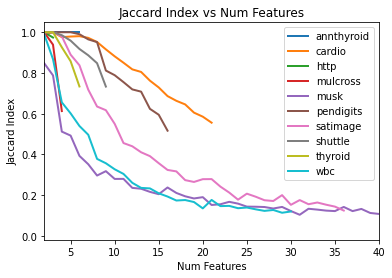

In [16]:
render_plot("n_features", "jaccard", "Num Features", "Jaccard Index", "Jaccard Index vs Num Features", "/jaccard_nfeatures.png")